In [45]:
import matplotlib.pyplot as plt

import sympy as sp
from sympy import symbols, Eq, Function


In [46]:
t, I0, k, l, m_G, g, c = symbols('t I_0 k l m_G g c')
theta = symbols('θ', cls=Function)
fi = symbols('φ', cls=Function)

In [47]:
φ = fi(t)
θ = theta(t)
fdot = sp.diff(φ, t)
fddot = sp.diff(fdot, t)
tdot = sp.diff(θ, t)
tddot = sp.diff(tdot, t)

In [48]:
T = 0.5 * I0 * fdot**2 + 0.5 * I0 * tdot**2
U = 0.5 * k * l**2 * (sp.sin(φ) - sp.sin(θ))**2 - m_G * g * c * sp.cos(φ) - m_G * g * c * sp.cos(θ)

In [56]:
L = sp.simplify(T - 0.5 * k * l**2 * (sp.sin(φ) - sp.sin(θ))**2 +  m_G * g * c * sp.cos(φ) + m_G * g * c * sp.cos(θ))

In [50]:
L

0.5*I_0*Derivative(θ(t), t)**2 + 0.5*I_0*Derivative(φ(t), t)**2 + c*g*m_G*cos(θ(t)) + c*g*m_G*cos(φ(t)) - 0.5*k*l**2*(sin(θ(t)) - sin(φ(t)))**2

In [51]:
U = 0.5 * k * l**2 *(φ - θ)**2 - m_G * g * c * (1 - 0.5 * θ**2)

In [57]:
eq_fi = sp.simplify(sp.diff(sp.diff(L, fdot), t) - sp.diff(L, φ))

In [58]:
eq_theta = sp.simplify(sp.diff(sp.diff(L, tdot), t) - sp.diff(L, θ))

In [59]:
eq_fi

1.0*I_0*Derivative(φ(t), (t, 2)) + c*g*m_G*sin(φ(t)) - 1.0*k*l**2*(sin(θ(t)) - sin(φ(t)))*cos(φ(t))

In [24]:
""""
with open("my_table1.tex", "w") as f:
    f.write("\\begin{tabular}{" + " | ".join(["c"] * len(data.columns)) + "}\n")
    for i, row in data.iterrows():
        f.write(" & ".join([str(x) for x in row.values]) + " \\\\\n")
    f.write("\\end{tabular}")
"""""
eq_theta

NameError: name 'eq_theta' is not defined

In [16]:
from Lab1_Analys import DATA, DATA1, DATA2, DATA3, DATA4, data
import matplotlib.pyplot as plt

In [28]:
DATA2.keys()

Index(['Frekvens (Hz)', 'Förstärkning, Ch A:1 Run #15',
       'Förstärkning, Ch A:1 Run #16', 'Förstärkning, Ch A:1 Run #17'],
      dtype='object')

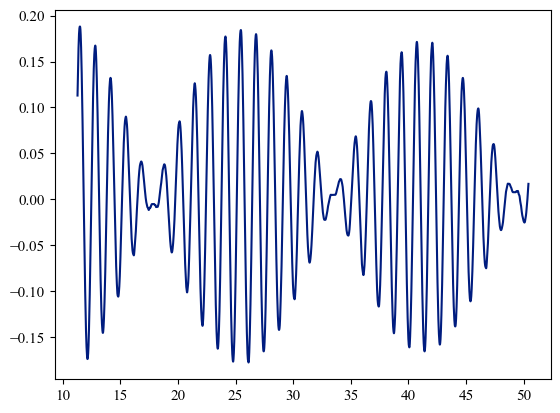

In [25]:
plt.plot(DATA['Time (s)'], DATA['Angle, Ch A:1 (rad) Run #15'])

(0.065, 0.085)

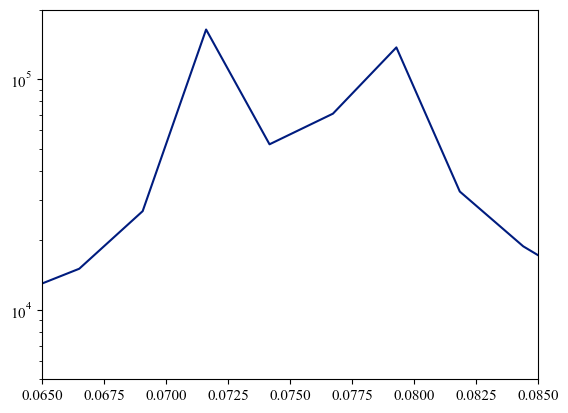

In [39]:

plt.plot(DATA2['Frekvens (Hz)'], DATA2['Förstärkning, Ch A:1 Run #15'])
plt.yscale('log')
plt.ylim(1e4/2, 2e5)
plt.xlim(0.065,0.085)

In [80]:
import numpy as np
def Ω1(ωminus, ωplus):
    return 0.5 * (ωminus - ωplus)
def Ω2(ωminus, ωplus):
    return 0.5 * (ωminus + ωplus)

def ωm(m, g, c, k, l, I0):
    return np.sqrt((m * g * c + 2 * k * l**2)/I0)

def ωp(m, g, l, I0):
    return np.sqrt(m * g * l / I0)

In [81]:
def I0(k, l, c, mc, mr, R1, R2, hc, sc, y1, R3, R4, hr, sr):
    Ic = (1 / 12) * mc * (3 * (R1 ** 2 + R2 ** 2) + hc ** 2)
    Ir = (1 / 12) * mr * (3 * (R3 ** 2 + R4 ** 2) + hr ** 2)

    return Ic + Ir + mc * sc ** 2 + mr * sr ** 2


k = 3.04
l = 12.5 / 100
c = 54 / 100
mc = 72 / 1000
R1 = (0.5 / 2) / 100
R2 = (2.3 / 2) / 100
hc = 1.8 / 100
sc = (hc / 2) + (54 / 100)
R3 = 0.1 / 100
R4 = (0.6 / 2) / 100
hr = 56 / 100
sr = hr / 2
mr = 30 / 1000
y1 = 54 / 100
m_G = mr + mc
g = 9.82

I0c = I0(k, l, c, mc, mr, R1, R2, hc, sc, y1, R3, R4, hr, sr)

In [82]:
print(m_G)

0.102


In [98]:
print(I0c)

0.024841384


In [84]:
ωminus = ωm(m_G, g, c, k, l, I0c)
ωplus = ωp(m_G, g, c, I0c)

Ω_1 = Ω1(ωminus, ωplus)
Ω_2 = Ω2(ωminus, ωplus)

In [85]:
print(ωplus)
print(ωminus)

4.666215753663457
5.05943010974454


In [96]:
def K(ωm, ωp):
    return (ωm**2 - ωp**2)/(ωm**2 + ωp**2)

Κ1 = K(ωminus, ωplus)

In [97]:
Κ1

0.08072937203085863

In [86]:
print(Ω_1)
print(Ω_2)

0.19660717804054162
4.862822931703999


In [89]:
t = np.linspace(10, 50, 1000)

def β(t, Ω1, Ω2):
    α = 0.18
    return α * np.sin(Ω1 * t) * np.sin(Ω2 * t)

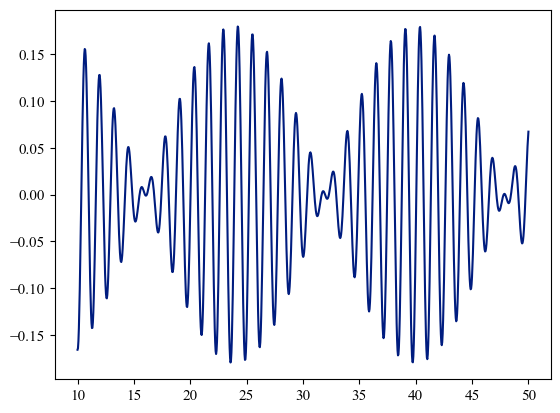

In [90]:
plt.plot(t, β(t, Ω_1, Ω_2))

In [100]:
import sympy as sp
mc, mr, R1, R2, hc, sc, R3, R4, hr, sr = sp.symbols('m_c m_r R_1 R_2 h_c s_c R_3 R_4 h_r s_r')

In [106]:
I = (1 / 12) * mc * (3 * (R1 ** 2 + R2 ** 2) + hc ** 2) + (1 / 12) * mr * (3 * (R3 ** 2 + R4 ** 2) + hr ** 2) + mc * sc ** 2 + mr * sr ** 2




In [109]:
sp.simplify(sp.diff(I, sr))

4*m_r**2*s_r**2

In [110]:
from sympy import Matrix

In [161]:
l = [mc, mr, R1, R2, hc, sc, R3, R4, hr, sr]
I = (1 / 12) * mc * (3 * (R1 ** 2 + R2 ** 2) + hc ** 2) + (1 / 12) * mr * (3 * (R3 ** 2 + R4 ** 2) + hr ** 2) + mc * sc ** 2 + mr * sr ** 2
#num = [mcnum, ...]

v = sp.zeros(len(l),1)
for i in range(len(l)):
    exp = sp.simplify(sp.diff(I, l[i]))**2
    v[i] = exp


os = Matrix(([1e-6**2, 1e-6**2, 1e-4**2, 1e-4**2, 1e-4**2, 2e-4**2, 1e-4**2, 1e-4**2, 1e-4**2, 2e-4**2]))



In [162]:
v1 = v.subs([(mc, 0.072), (mr, 0.03093), (R1, 0.0025), (R2, 0.0115), (hc, 0.018), (sc, 0.549), (R3, 0.0029), (R4, 0.0030), (hr, 0.558), (sr, 0.28)])

σ = sp.sqrt(v1.dot(os))

In [163]:
σ

1.61920123508686e-5

In [128]:
def ωm(m, g, c, k, l, I0):
    return np.sqrt((m * g * c + 2 * k * l**2)/I0)

def ωp(m, g, c, I0):
    return np.sqrt(m * g * c / I0)

0.0238114750234728

In [ ]:
ωminus

In [164]:
g, c, k, l, I0 = sp.symbols('g c k l I0')
m_g1 = sp.Symbol('m_G')

lista = [m_g1, g, c, k, l, I0]
lista2 = [m_g1, g, c, I0]

ωm1 = sp.sqrt((m_g1 * g * c + 2 * k * l**2)/I0)
ωp1 = sp.sqrt(m_g1 * g * c/I0)


v2 = sp.zeros(len(lista),1)

for i in range(len(lista)):
    exp = sp.simplify(sp.diff(ωm1, lista[i]))**2
    v2[i] = exp

os1 = Matrix(([1e-6**2, 0, 1e-4**2, 0.2**2, 1e-4**2, σ**2]))

v3 = v2.subs([(m_g1, 0.10293),(g, 9.82), (c, 0.54), (k, 3.04), (l, 0.125), (I0, 0.025)])


σ1 = sp.sqrt(v3.dot(os1))



In [168]:
σ1

0.0247544295747103